In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 259s 2us/step


In [3]:
# Split the dataset into training, validation, and testing subsets
train_size = int(0.6 * len(train_images))
val_size = int(0.2 * len(train_images))
test_size = int(0.2 * len(train_images))

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) 
val_dataset = tf.data.Dataset.from_tensor_slices((train_images[train_size:], train_labels[train_size:])) 
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [4]:
def create_model(x1, m1, x2, m2, x3, d):
    model = keras.Sequential([
        layers.Conv2D(x1, (m1, m1), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(x2, (m2, m2), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(x3, activation='relu'),
        layers.Dropout(d),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])

    return model

In [5]:
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5

In [6]:
def train_model(model, train_dataset, val_dataset, epochs, lr):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_dataset.batch(64), epochs=epochs, validation_data=val_dataset.batch(64))

    return history.history['loss'], history.history['val_loss']

In [7]:
model = create_model(x1, m1, x2, m2, x3, d)
train_losses, val_losses = train_model(model, train_dataset, val_dataset, epochs=2, lr=0.001)

Epoch 1/2
782/782 [==============================] - 18s 22ms/step - loss: 1.7117 - accuracy: 0.3738 - val_loss: 1.3637 - val_accuracy: 0.5084
Epoch 2/2
782/782 [==============================] - 17s 22ms/step - loss: 1.4024 - accuracy: 0.4971 - val_loss: 1.1924 - val_accuracy: 0.5787


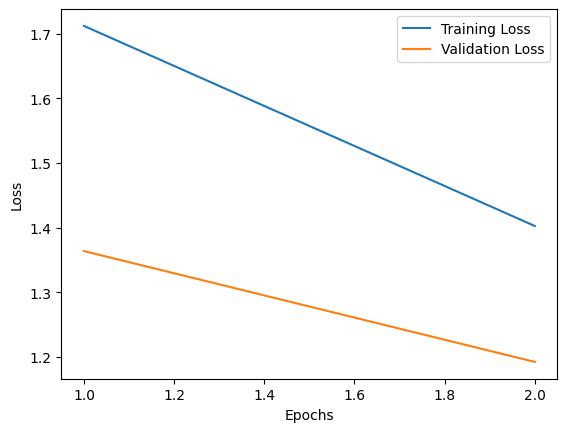

In [8]:
plt.plot(range(1, 3), train_losses, label='Training Loss')
plt.plot(range(1, 3), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model.evaluate(test_dataset.batch(64))

157/157 [==============================] - 1s 7ms/step - loss: 1.2109 - accuracy: 0.5728


[1.210934042930603, 0.5727999806404114]

Epoch 1/2
782/782 [==============================] - 20s 25ms/step - loss: 2.0433 - accuracy: 0.2521 - val_loss: 1.7882 - val_accuracy: 0.3667
Epoch 2/2
782/782 [==============================] - 25s 33ms/step - loss: 1.7625 - accuracy: 0.3597 - val_loss: 1.6230 - val_accuracy: 0.4292
Epoch 1/2
782/782 [==============================] - 25s 31ms/step - loss: 1.7201 - accuracy: 0.3673 - val_loss: 1.4109 - val_accuracy: 0.4873
Epoch 2/2
782/782 [==============================] - 24s 31ms/step - loss: 1.4146 - accuracy: 0.4923 - val_loss: 1.2020 - val_accuracy: 0.5762
Epoch 1/2
782/782 [==============================] - 26s 32ms/step - loss: 2.1376 - accuracy: 0.1904 - val_loss: 1.8504 - val_accuracy: 0.3155
Epoch 2/2
782/782 [==============================] - 25s 32ms/step - loss: 1.8776 - accuracy: 0.2987 - val_loss: 1.7257 - val_accuracy: 0.3599
Epoch 1/2
782/782 [==============================] - 25s 31ms/step - loss: 4.1017 - accuracy: 0.1007 - val_loss: 2.3198 - val_accuracy: 0.0988

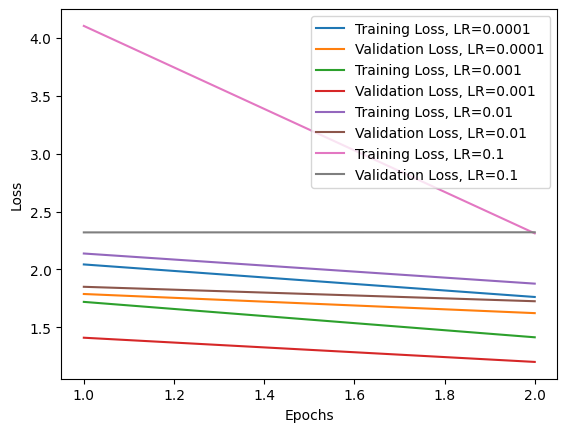

In [10]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    model = create_model(x1, m1, x2, m2, x3, d)
    train_losses, val_losses = train_model(model, train_dataset, val_dataset, epochs=2, lr=lr)

    plt.plot(range(1, 3), train_losses, label=f'Training Loss, LR={lr}')
    plt.plot(range(1, 3), val_losses, label=f'Validation Loss, LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()